In [2]:
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/18_BankConversions')
df_train=pd.read_csv('01.RawData/train.csv',index_col=['ID'])
df_test=pd.read_csv('01.RawData/test.csv',index_col=['ID'])
df_train['DOB1']=df_train['DOB'].map(lambda x: datetime(1900+int(x[6:]),int(x[3:5]),int(x[:2])) if len(str(x))>=8 else date(1997,1,1))
df_train['Lead_Creation_Date1']=df_train['Lead_Creation_Date'].map(lambda x: datetime(2000+int(x[6:]),int(x[3:5]),int(x[:2])) if len(str(x))>=8 else date(1997,1,1))


NameError: global name 'date' is not defined

In [138]:
df_train.head()

,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,...,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,DOB1,Lead_Creation_Date1
ID,,,,,,,,,,,,,,,,,,,,,
APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,B001,...,G,0.0,NaN,NaN,NaN,NaN,0,0,1979-07-23,2016-07-15
APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,B002,...,G,0.0,20000.0,2.0,13.25,953.0,10,0,1986-12-07,2016-07-04
APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,B003,...,B,0.0,45000.0,4.0,NaN,NaN,0,0,1982-12-10,2016-07-19
APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,B003,...,B,0.0,92000.0,5.0,NaN,NaN,7,0,1989-01-30,2016-07-09
APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,B001,...,B,2500.0,50000.0,2.0,NaN,NaN,10,0,1985-04-19,2016-07-20


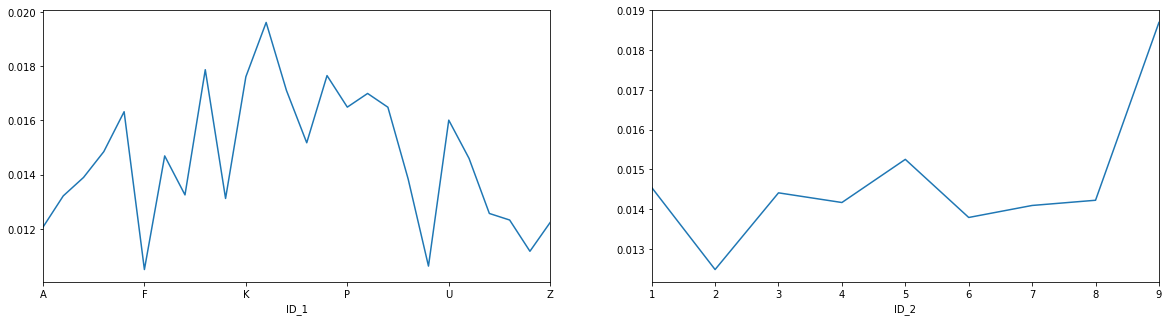

In [139]:
df_train['ID_1']=df_train.index.map(lambda x: x[3])
df_train['ID_2']=df_train.index.map(lambda x: x[4])
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df_train.groupby(['ID_1'])['Approved'].mean().plot()
plt.subplot(1,2,2)
df_train.groupby(['ID_2'])['Approved'].mean().plot()

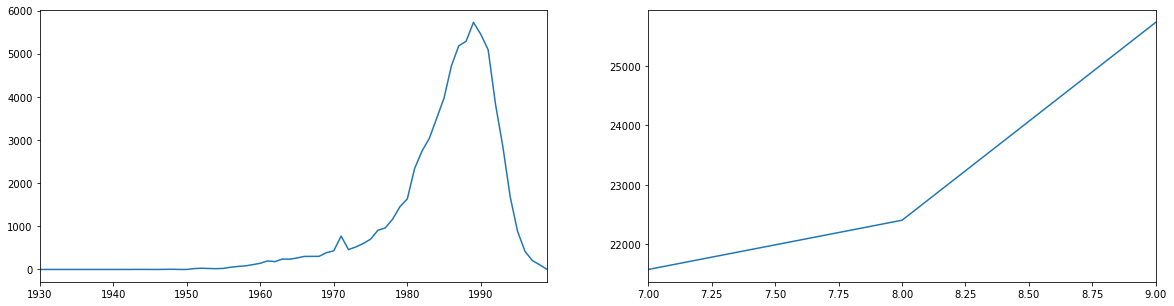

In [140]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df_train.DOB1.dt.year.value_counts().sort_index().plot()
plt.subplot(1,2,2)
df_train.Lead_Creation_Date1.dt.month.value_counts().sort_index().plot()


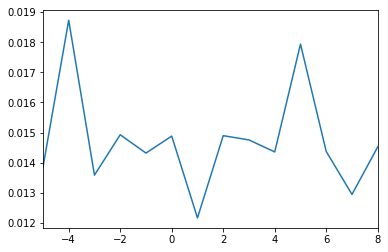

In [152]:
df_train.groupby(df_train.Lead_Creation_Date1.dt.month-df_train.DOB1.dt.month)['Approved'].mean().plot()


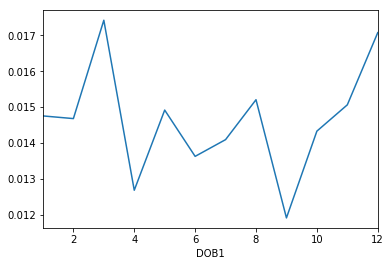

In [153]:
df_train.groupby(df_train.DOB1.dt.month)['Approved'].mean().plot()


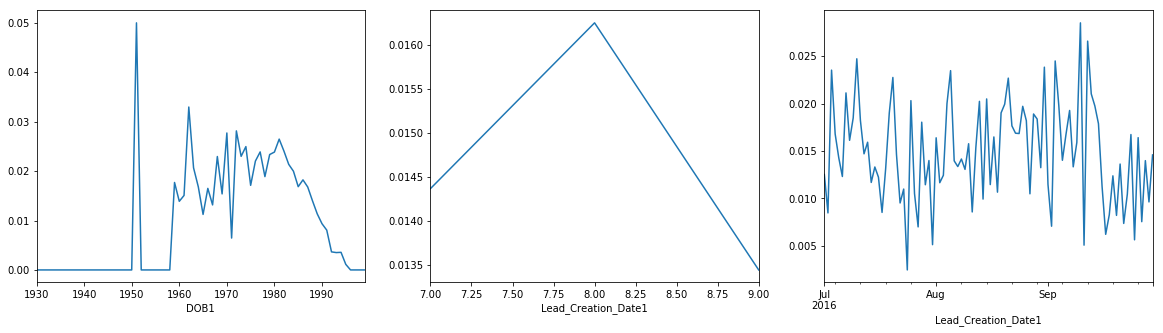

In [141]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df_train.groupby(df_train.DOB1.dt.year)['Approved'].mean().plot()
plt.subplot(1,3,2)
df_train.groupby(df_train.Lead_Creation_Date1.dt.month)['Approved'].mean().plot()
plt.subplot(1,3,3)
df_train.groupby(df_train.Lead_Creation_Date1.dt.week)['Approved'].mean().plot()


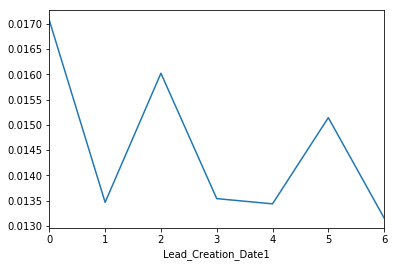

In [146]:
df_train.groupby(df_train.Lead_Creation_Date1.dt.dayofweek)['Approved'].mean().plot()

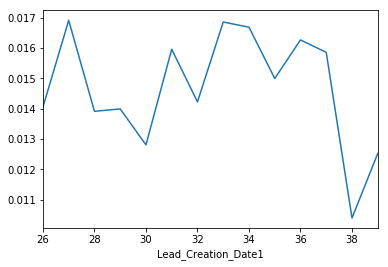

In [149]:
df_train.groupby(df_train.Lead_Creation_Date1.dt.week)['Approved'].mean().plot()

In [ ]:
df_train.groupby(df_train.Lead_Creation_Date1.dt.week)['Approved'].mean().plot()

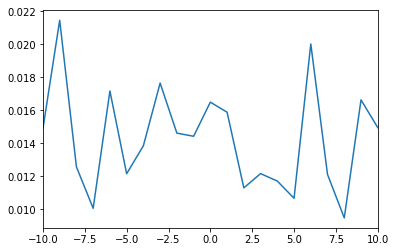

In [158]:
df_train.groupby(np.clip(df_train.Lead_Creation_Date1.dt.week-df_train.DOB1.dt.week,-10,10))['Approved'].mean().plot()

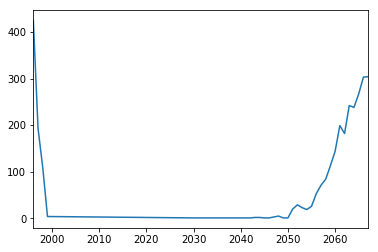

In [89]:
np.clip(df_train.DOB.dt.year,1995,2100).value_counts().sort_index().iloc[1:].plot()

In [94]:
df_train['FEAT_AGE']=df_train['Lead_Creation_Date']-df_train['DOB']
df_train[df_train['FEAT_AGE'].dt.days<0]

,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,...,FEAT_ID_4,FEAT_ID_5,FEAT_ID_6,FEAT_ID_7,FEAT_ID_8,FEAT_ID_9,FEAT_ID_10,FEAT_ID_11,FEAT_GENDER,FEAT_AGE
ID,,,,,,,,,,,,,,,,,,,,,
APPI40412748047,Male,2051-07-20,2016-07-01,C10003,A,COM0015350,A,4.0,4500.0,B002,...,1,6,6,2,8,6,1,3,1,-12802 days
APPQ20489237441,Female,2060-12-21,2016-07-01,C10210,C,COM0030195,A,4.0,15150.0,B032,...,2,2,1,3,5,2,1,4,0,-16244 days
APPX20851623713,Male,2067-05-04,2016-07-01,C10004,A,COM0002676,A,4.0,6000.0,B031,...,7,1,4,9,1,9,3,2,1,-18569 days
APPH70914946713,Female,2062-11-10,2016-07-01,C10519,C,COM0036037,A,4.0,5000.0,B003,...,1,3,7,2,4,9,3,2,0,-16933 days
APPL10781772115,Female,2059-03-31,2016-07-01,C10018,C,COM0050107,A,4.0,1800.0,B033,...,2,1,6,0,6,7,3,0,0,-15613 days
APPP80876282503,Male,2066-06-27,2016-07-01,C10140,C,COM0014582,A,4.0,3000.0,NaN,...,3,7,1,8,6,3,4,2,1,-18258 days
APPR90078611938,Female,2066-12-15,2016-07-01,C10112,C,COM0024153,A,4.0,2400.0,B039,...,3,8,4,5,0,8,2,7,0,-18429 days
APPX60060678519,Female,2064-10-11,2016-07-01,C10006,A,COM0056133,A,4.0,4000.0,B012,...,9,5,4,0,8,3,3,5,0,-17634 days
APPG60013275436,Female,2067-07-05,2016-07-01,C10060,C,COM0000011,A,1.0,4000.0,B003,...,1,0,1,0,3,2,2,6,0,-18631 days


In [304]:
for i in range(12):
    df_train['FEAT_ID_%d'%i],_=pd.factorize(df_train.index.map(lambda x: x[3+i]))
df_train['FEAT_GENDER'],_=pd.factorize(df_train['Gender'])
df_train['FEAT_DOB_YEAR'],_=pd.factorize(df_train['DOB1'].dt.year)
df_train['FEAT_DOB_MONTH'],_=pd.factorize(df_train['DOB1'].dt.month)
df_train['FEAT_LCD_MONTH'],_=pd.factorize(df_train['Lead_Creation_Date1'].dt.month)
df_train['FEAT_LCD_WEEK'],_=pd.factorize(df_train['Lead_Creation_Date1'].dt.week)
df_train['FEAT_LCD_DOW'],_=pd.factorize(df_train['Lead_Creation_Date1'].dt.dayofweek)
df_train['FEAT_DOB_MONTH'],_=pd.factorize(df_train['DOB1'].dt.month)
df_train['FEAT_DOB_LCD_MONTH_DIFF'],_=pd.factorize(df_train['Lead_Creation_Date1'].dt.month-df_train['DOB1'].dt.month)
df_train['FEAT_DOB_LCD_WEEK_DIFF'],_=pd.factorize(np.clip(df_train.Lead_Creation_Date1.dt.week-df_train.DOB1.dt.week,-10,10))
df_train['FEAT_DOB_LCD_DAY_DIFF'],_=pd.factorize(np.clip(df_train.Lead_Creation_Date1.dt.dayofyear-df_train.DOB1.dt.dayofyear,-10,10))

for i in range(6):
    df_train['FEAT_CITY1_%d'%i],_=pd.factorize(df_train['City_Code'].map(lambda x: str(x)[:i+1]))
df_train['FEAT_CITY2'],_=pd.factorize(df_train['City_Category'])
for i in range(4):
    df_train['FEAT_EMP1_%d'%i]=df_train['Employer_Code'].map(lambda x: str(x)[:-i-1])
df_train['FEAT_EMP2'],_=pd.factorize(df_train['Employer_Category1'])
df_train['FEAT_EMP3'],_=pd.factorize(df_train['Employer_Category2'])
df_train['FEAT_INCOME1']=np.clip(np.log1p(df_train['Monthly_Income']),0,10)
df_train['FEAT_INCOME2']=df_train['Monthly_Income'].astype(np.int64)%10
df_train['FEAT_BANK1'],_=pd.factorize(df_train['Customer_Existing_Primary_Bank_Code'])
df_train['FEAT_BANK2'],_=pd.factorize(df_train['Customer_Existing_Primary_Bank_Code'].map(lambda x: str(x)[:-1]))
df_train['FEAT_BANK3'],_=pd.factorize(df_train['Primary_Bank_Type'])
df_train['FEAT_CONTACT1'],_=pd.factorize(df_train['Contacted'])
df_train['FEAT_CONTACT2'],_=pd.factorize(df_train['Source'])
df_train['FEAT_CONTACT3'],_=pd.factorize(df_train['Source'].map(lambda x: x[:3]))
df_train['FEAT_CONTACT4'],_=pd.factorize(df_train['Source'].map(lambda x: x[3]))
df_train['FEAT_CONTACT5'],_=pd.factorize(df_train['Source_Category'])
df_train['FEAT_EMI1'],_=pd.factorize(df_train['Existing_EMI']==0)
df_train['FEAT_EMI2'],_=pd.factorize(pd.cut(df_train['Existing_EMI'],[0,100,300,600,1200,2400,3600,10000000]))
df_train['FEAT_LOAN1'],_=pd.factorize(df_train['Loan_Amount'].isnull())
df_train['FEAT_LOAN2'],_=pd.factorize(pd.cut(df_train['Loan_Amount'].fillna(-1),[-100,-1,0,5000,10000,20000,30000,50000,100000,10000000]))
df_train['FEAT_LOAN3'],_=pd.factorize(df_train['Loan_Period'].fillna(-1))
df_train['FEAT_LOAN4'],_=pd.factorize((df_train['Interest_Rate'].fillna(-10)/5).astype(np.int64))
df_train['FEAT_VAR1'],_=pd.factorize(df_train['Var1'])



In [291]:
#df_train[[x for x in df_train.columns if 'FEAT_EMP1_' in x]]
df_train.iloc[10:,15:20]

,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
ID,,,,,
APPP50632654511,20000.0,5.0,18.00,508.0,7
APPS60734495841,30000.0,5.0,15.50,722.0,0
APPT10286486907,NaN,NaN,NaN,NaN,0
APPV30088583138,45000.0,5.0,NaN,NaN,10
APPW10037615244,104000.0,5.0,NaN,NaN,7
APPY60885704429,NaN,NaN,NaN,NaN,0
APPA40017703642,74000.0,5.0,NaN,NaN,10
APPB50503946704,NaN,NaN,NaN,NaN,10
APPC20296288829,26000.0,2.0,20.00,1323.0,4


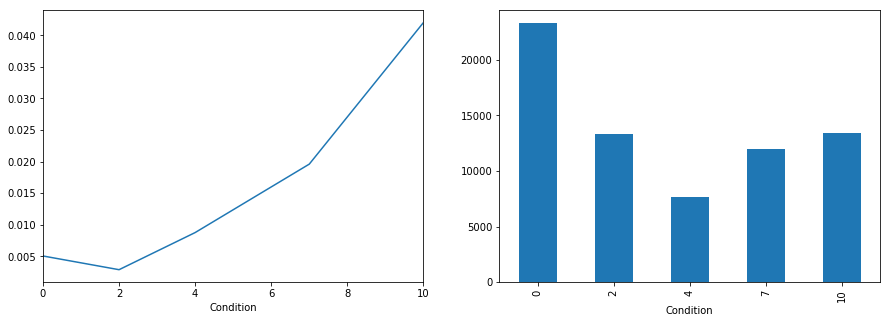

In [306]:
df_train['Condition']=(df_train['Var1'].fillna(-1))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_train['Approved'].groupby(df_train['Condition']).mean().sort_index().plot()
plt.subplot(1,2,2)
df_train['Approved'].groupby(df_train['Condition']).size().sort_index().plot(kind='bar')


In [293]:
df_train[df_train['Loan_Amount']>0]['Loan_Amount'].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95])

count     42004.000000
mean      39429.982859
std       30727.595990
min        5000.000000
1%         6000.000000
5%        10000.000000
10%       10000.000000
25%       20000.000000
50%       30000.000000
75%       50000.000000
90%       80000.000000
95%      100000.000000
max      300000.000000
Name: Loan_Amount, dtype: float64

In [3]:
print len(df_train)
np.clip(df_train['Monthly_Income'],0,9500).describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95])
#np.clip(np.log1p(df_train['Monthly_Income']),0,10).plot(kind='density')

69713


count    69713.000000
mean      3161.562601
std       2210.310642
min          0.000000
1%         284.104000
5%        1000.000000
10%       1200.000000
25%       1650.000000
50%       2500.000000
75%       4000.000000
90%       6200.000000
95%       9500.000000
max       9500.000000
Name: Monthly_Income, dtype: float64

In [4]:
df_train['Loan_Amount'].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95])


count     42004.000000
mean      39429.982859
std       30727.595990
min        5000.000000
1%         6000.000000
5%        10000.000000
10%       10000.000000
25%       20000.000000
50%       30000.000000
75%       50000.000000
90%       80000.000000
95%      100000.000000
max      300000.000000
Name: Loan_Amount, dtype: float64

In [9]:
df_train[['Existing_EMI','Loan_Amount','Loan_Period','Approved']].dropna().sort_values('Approved')

,Existing_EMI,Loan_Amount,Loan_Period,Approved
ID,,,,
APPD40611263344,0.0,20000.0,2.0,0
APPV20039417711,0.0,10000.0,3.0,0
APPW70525846821,880.0,50000.0,3.0,0
APPX40060844933,800.0,20000.0,2.0,0
APPY40663931008,0.0,52000.0,4.0,0
APPA90238674221,0.0,47000.0,4.0,0
APPD90266665522,0.0,120000.0,4.0,0
APPE90124339634,800.0,37000.0,5.0,0
APPU60977397645,1500.0,20000.0,2.0,0
